In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(32, 3, padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(32, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(64, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(0.5)(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 307,114 (1.17 MB)

 Trainable params: 305,962 (1.17 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# Train with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=30,
          validation_data=(x_test, y_test),
          shuffle=True)

model.evaluate(x_test, y_test, batch_size=1000)

CLASSES = np.array([
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck",
])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]
loss, accuracy = model.evaluate(x_test, y_test, batch_size=1000)
print(f"Test Accuracy: {accuracy*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 486s 613ms/step - accuracy: 0.3107 - loss: 1.9837 - val_accuracy: 0.4831 - val_loss: 1.5452
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 499s 639ms/step - accuracy: 0.5043 - loss: 1.3792 - val_accuracy: 0.5583 - val_loss: 1.3692
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 478s 612ms/step - accuracy: 0.5680 - loss: 1.2061 - val_accuracy: 0.6043 - val_loss: 1.1801
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 475s 607ms/step - accuracy: 0.6055 - loss: 1.1210 - val_accuracy: 0.5849 - val_loss: 1.3386
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 500s 639ms/step - accuracy: 0.6219 - loss: 1.0688 - val_accuracy: 0.6306 - val_loss: 1.0563
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 505s 645ms/step - accuracy: 0.6453 - loss: 1.0098 - val_accuracy: 0.6174 - val_loss: 1.1502
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 501s 641ms/step - accuracy: 0.6593 - loss: 0.9670 - val_accuracy: 0.6727 - val_loss: 0.9395
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 496s 634ms/step - accuracy: 0.6766 -

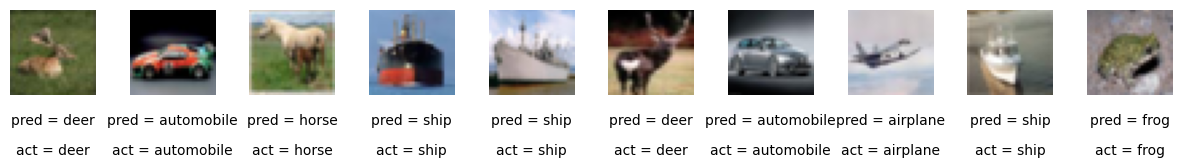

In [ ]:
# Display some predictions
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred = " + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, "act = " + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(img)